In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import datetime


### First step to analyze MTA turnstile data 
 
- Download MTA turnstile data files for the following four months of 2018: ```Jul ,  Aug , Sep ,Oct```

- Load the files into a pandas DataFrame (`pd.read_csv()` to load files and `pd.concat()` to combine DataFrames)


In [2]:
def get_data(week_nums):
    url="http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs=[]
    for week_num in week_nums:
        file_url=url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
# Sep ,  Aug , July ,Oct of 2018
week_nums=[180929,180922,180915,180908,180901,
           180825,180818,180811,180804,
           180728,180721,180714,180707,
           181027,181020,181013,181006] 
mta=get_data(week_nums)
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,00:00:00,REGULAR,6767488,2294227
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,04:00:00,REGULAR,6767499,2294230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,08:00:00,REGULAR,6767517,2294258
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,12:00:00,REGULAR,6767607,2294323
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,16:00:00,REGULAR,6767790,2294368


In [3]:
# Here I convert mta data frame to csv file using (to_csv)
csv_file=mta.to_csv('mta_CSV.csv', index=False)

In [4]:
# Then I connect this notebook to the MTA.db database using create_engine
engine = create_engine("sqlite:////Users/eman./Desktop/BootCamp/Project1/MTA.db")
mta.to_sql('mta_2018', con=engine)

ValueError: Table 'mta_2018' already exists.

In [5]:
# List the table names in the database, here there is only one table name mta1
all_tables = engine.table_names()
all_tables

<ipython-input-5-20dd25fbdd17>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['mta_2018']

### Some Queries we applied on The data 
 


In [6]:
# I am trying to do a query to display all columns from mta1 table
mta_data = pd.read_sql('SELECT * FROM mta_2018;', engine)
mta_data

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
0,0,A002,R051,02-00-00,59 ST,NQR456W,06/30/2018,00:00:00,6675523,2262828,2018-06-30 00:00:00.000000,Saturday
1,178064,R518,R261,00-03-00,40 ST LOWERY ST,7,06/30/2018,00:00:00,9038119,12124996,2018-06-30 00:00:00.000000,Saturday
2,55691,N091,R029,02-05-01,CHAMBERS ST,ACE23,06/30/2018,00:00:00,11971342,11812622,2018-06-30 00:00:00.000000,Saturday
3,55649,N091,R029,02-05-00,CHAMBERS ST,ACE23,06/30/2018,00:00:00,117873917,71159,2018-06-30 00:00:00.000000,Saturday
4,55607,N091,R029,02-00-05,CHAMBERS ST,ACE23,06/30/2018,00:00:00,12757481,11088167,2018-06-30 00:00:00.000000,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
555151,122202,PTH22,R540,00-02-00,PATH NEW WTC,1,10/26/2018,04:10:32,145077,110146,2018-10-26 04:10:32.000000,Friday
555152,112890,PTH04,R551,00-00-05,GROVE STREET,1,10/26/2018,04:11:44,1569503,1993911,2018-10-26 04:11:44.000000,Friday
555153,113520,PTH05,R543,00-00-01,EXCHANGE PLACE,1,10/26/2018,07:23:23,295453,13162,2018-10-26 07:23:23.000000,Friday
555154,845,A006,R079,00-03-02,5 AV/59 ST,NQRW,10/26/2018,14:00:00,336,300,2018-10-26 14:00:00.000000,Friday


In [7]:
# another query with condition ENTRIES="7637236"
mta_data = pd.read_sql('SELECT * FROM mta_2018 where ENTRIES="458752";', engine)
mta_data

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
0,39122,J032,R006,01-05-01,WOODHAVEN BLVD,JZ,06/30/2018,00:00:00,458752,21,2018-06-30 00:00:00.000000,Saturday
1,188013,R610,R057,00-05-01,ATL AV-BARCLAY,2345BDNQR,06/30/2018,00:00:00,458752,55,2018-06-30 00:00:00.000000,Saturday
2,134152,R158,R084,00-05-04,59 ST COLUMBUS,1ABCD,06/30/2018,00:00:00,458752,79,2018-06-30 00:00:00.000000,Saturday
3,87340,N343,R019,00-05-01,JAMAICA 179 ST,F,06/30/2018,00:00:00,458752,16,2018-06-30 00:00:00.000000,Saturday
4,100734,N541,R241,01-05-01,15 ST-PROSPECT,FG,06/30/2018,00:30:00,458752,3,2018-06-30 00:30:00.000000,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,129060,R121,R290,01-05-01,HOUSTON ST,1,10/26/2018,01:00:00,458752,135,2018-10-26 01:00:00.000000,Friday
1212,168410,R317,R408,01-05-01,SIMPSON ST,25,10/26/2018,01:00:00,458752,1,2018-10-26 01:00:00.000000,Friday
1213,170800,R331,R364,00-05-01,GUN HILL RD,25,10/26/2018,01:00:00,458752,161,2018-10-26 01:00:00.000000,Friday
1214,73263,N220,R155,01-06-01,KINGSBRIDGE RD,BD,10/26/2018,01:00:00,458752,22,2018-10-26 01:00:00.000000,Friday


In [8]:
UNIT_R006 = pd.read_sql('SELECT * FROM mta_2018 where UNIT="R006";', engine)
UNIT_R006 

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
0,39080,J032,R006,01-05-00,WOODHAVEN BLVD,JZ,06/30/2018,00:00:00,33554671,0,2018-06-30 00:00:00.000000,Saturday
1,39038,J031,R006,00-00-03,WOODHAVEN BLVD,JZ,06/30/2018,00:00:00,7651437,5154171,2018-06-30 00:00:00.000000,Saturday
2,38996,J031,R006,00-00-02,WOODHAVEN BLVD,JZ,06/30/2018,00:00:00,4078535,2066115,2018-06-30 00:00:00.000000,Saturday
3,38954,J031,R006,00-00-01,WOODHAVEN BLVD,JZ,06/30/2018,00:00:00,2216917,1501355,2018-06-30 00:00:00.000000,Saturday
4,38912,J031,R006,00-00-00,WOODHAVEN BLVD,JZ,06/30/2018,00:00:00,4571253,6037539,2018-06-30 00:00:00.000000,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
947,39509,J032,R006,01-05-01,WOODHAVEN BLVD,JZ,10/26/2018,00:00:00,458752,44,2018-10-26 00:00:00.000000,Friday
948,39341,J031,R006,00-00-01,WOODHAVEN BLVD,JZ,10/26/2018,00:00:00,2270377,1535000,2018-10-26 00:00:00.000000,Friday
949,39299,J031,R006,00-00-00,WOODHAVEN BLVD,JZ,10/26/2018,00:00:00,4657082,6111695,2018-10-26 00:00:00.000000,Friday
950,39383,J031,R006,00-00-02,WOODHAVEN BLVD,JZ,10/26/2018,00:00:00,4138292,2100861,2018-10-26 00:00:00.000000,Friday


In [9]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

### Strip function used for column to remove leading and trailing spaces


In [10]:
mta.columns=[column.strip() for column in mta.columns]
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
# I used info() to display a summary of mta DataFrame 
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3358893 entries, 0 to 198732
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 307.5+ MB


In [12]:
# I used .describe() for numerical columns
mta.describe()

,ENTRIES,EXITS
count,3.358893e+06,3.358893e+06
mean,3.988377e+07,3.255125e+07
std,2.062800e+08,1.898243e+08
min,0.000000e+00,0.000000e+00
25%,4.885620e+05,2.317350e+05
50%,2.478896e+06,1.396302e+06
75%,6.935807e+06,4.788857e+06
max,2.144893e+09,2.146093e+09


In [13]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE" is unique
(mta
 .groupby(["C/A","UNIT","SCP","STATION","DATE"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
479424,R404,R447,00-00-00,CYPRESS AV,07/07/2018,39
479662,R404,R447,00-00-02,CYPRESS AV,07/07/2018,39
479543,R404,R447,00-00-01,CYPRESS AV,07/07/2018,39
313551,PTH03,R552,00-01-04,JOURNAL SQUARE,09/23/2018,38
473617,R327,R361,01-06-00,PELHAM PKWY,07/31/2018,33
473736,R327,R361,01-06-01,PELHAM PKWY,07/31/2018,33
275045,N525,R142,01-00-01,DELANCEY/ESSEX,09/22/2018,30
275283,N525,R142,01-00-03,DELANCEY/ESSEX,09/22/2018,30
274926,N525,R142,01-00-00,DELANCEY/ESSEX,09/22/2018,30
275164,N525,R142,01-00-02,DELANCEY/ESSEX,09/22/2018,30


In [14]:
# Remove duplicate entry
mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE"], 
                          inplace=True, ascending=False)
mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE"], inplace=True)

In [15]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
200032,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2018,01:00:00,REGULAR,5554,365
200026,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/25/2018,01:00:00,REGULAR,5554,365
200020,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/24/2018,01:00:00,REGULAR,5554,364
200014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/23/2018,01:00:00,REGULAR,5554,364
200008,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/22/2018,01:00:00,REGULAR,5554,364


In [16]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557286 entries, 200032 to 0
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C/A       557286 non-null  object
 1   UNIT      557286 non-null  object
 2   SCP       557286 non-null  object
 3   STATION   557286 non-null  object
 4   LINENAME  557286 non-null  object
 5   DIVISION  557286 non-null  object
 6   DATE      557286 non-null  object
 7   TIME      557286 non-null  object
 8   DESC      557286 non-null  object
 9   ENTRIES   557286 non-null  int64 
 10  EXITS     557286 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 51.0+ MB


In [17]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(mta
 .groupby(["C/A","UNIT","SCP","STATION","DATE"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/30/2018,1
371526,R142,R293,01-06-00,34 ST-PENN STA,08/31/2018,1
371520,R142,R293,01-06-00,34 ST-PENN STA,08/25/2018,1
371521,R142,R293,01-06-00,34 ST-PENN STA,08/26/2018,1
371522,R142,R293,01-06-00,34 ST-PENN STA,08/27/2018,1


### No more duplicate Entries

In [18]:
print("Maximum date: ")
print(mta["DATE"].max())
print()
print("Minimum date: ")
print(mta["DATE"].min())

Maximum date: 
10/26/2018

Minimum date: 
06/30/2018


In [19]:
mta.EXITS.describe()

count    5.572860e+05
mean     3.243421e+07
std      1.895106e+08
min      0.000000e+00
25%      2.270268e+05
50%      1.375196e+06
75%      4.757312e+06
max      2.146093e+09
Name: EXITS, dtype: float64

In [20]:
mta.ENTRIES.describe()

count    5.572860e+05
mean     3.970995e+07
std      2.057595e+08
min      0.000000e+00
25%      4.785705e+05
50%      2.442774e+06
75%      6.894634e+06
max      2.129853e+09
Name: ENTRIES, dtype: float64

### To return REGULAR values only in DESC Column

In [21]:
# remove 'RECOVR AUD' values in DESC Column
mta = mta[mta.DESC != 'RECOVR AUD']

In [22]:
mta.shape

(555156, 11)

### Drop Unnecessary columns

In [23]:
# Drop DIVISION and Desc Column.
mta = mta.drop(["DESC","DIVISION"], axis=1, errors="ignore")

In [24]:
mta.shape

(555156, 9)

In [25]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE', 'TIME', 'ENTRIES',
       'EXITS'],
      dtype='object')

### Convert Date and Time columns into `Datatime`  column.
- Using pd.to_datetime
- We combine the Date and Time columns into a single new column of the datetime datatype

In [26]:
# here I combine the DATE and TIME in one columns named DATE_TIME
mta["DATE_TIME"] = pd.to_datetime(mta.DATE + " " + mta.TIME, 
                         format="%m/%d/%Y      %H:%M:%S")

In [27]:
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME
24,A002,R051,02-00-00,59 ST,NQR456W,07/04/2018,00:00:00,6679449,2264049,2018-07-04
18,A002,R051,02-00-00,59 ST,NQR456W,07/03/2018,00:00:00,6678118,2263609,2018-07-03
12,A002,R051,02-00-00,59 ST,NQR456W,07/02/2018,00:00:00,6676762,2263176,2018-07-02
6,A002,R051,02-00-00,59 ST,NQR456W,07/01/2018,00:00:00,6676241,2263043,2018-07-01
0,A002,R051,02-00-00,59 ST,NQR456W,06/30/2018,00:00:00,6675523,2262828,2018-06-30


In [28]:
#mta.info()

In [29]:
#We sort the datatime in ascending way to see the 4th difference between a certain row
#and the previous row easily.
mta.sort_values(by=['DATE','DATE_TIME'], ascending=True,inplace=True)

In [30]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME
196494,S101A,R070,01-05-01,ST. GEORGE,1,06/30/2018,00:00:00,537,0,2018-06-30
196452,S101A,R070,01-05-00,ST. GEORGE,1,06/30/2018,00:00:00,823,0,2018-06-30
196410,S101A,R070,01-03-03,ST. GEORGE,1,06/30/2018,00:00:00,1267193,203,2018-06-30
196368,S101A,R070,01-03-02,ST. GEORGE,1,06/30/2018,00:00:00,262351,10,2018-06-30
196326,S101A,R070,01-03-01,ST. GEORGE,1,06/30/2018,00:00:00,1745684,205,2018-06-30


### We created a new column  named "DAY_NAME"  and "TIME"

In [31]:

mta["DAY_NAME"]= mta["DATE_TIME"].dt.day_name()

In [32]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
196494,S101A,R070,01-05-01,ST. GEORGE,1,06/30/2018,00:00:00,537,0,2018-06-30,Saturday
196452,S101A,R070,01-05-00,ST. GEORGE,1,06/30/2018,00:00:00,823,0,2018-06-30,Saturday
196410,S101A,R070,01-03-03,ST. GEORGE,1,06/30/2018,00:00:00,1267193,203,2018-06-30,Saturday
196368,S101A,R070,01-03-02,ST. GEORGE,1,06/30/2018,00:00:00,262351,10,2018-06-30,Saturday
196326,S101A,R070,01-03-01,ST. GEORGE,1,06/30/2018,00:00:00,1745684,205,2018-06-30,Saturday


In [33]:
# Show 3 rows randomly.
mta.sample(3)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
84628,N334B,R341,00-06-01,75 AV,EF,08/10/2018,00:00:00,558993,52722,2018-08-10 00:00:00,Friday
36935,J007,R377,00-05-01,FLUSHING AV,JM,07/31/2018,01:00:00,150994944,16777350,2018-07-31 01:00:00,Tuesday
185120,R600,R224,00-00-00,CLARK ST,23,07/09/2018,00:00:00,2800510,7450657,2018-07-09 00:00:00,Monday


In [34]:
#mta.info()

In [35]:
mta.DAY_NAME.value_counts()

Monday       79374
Saturday     79332
Thursday     79316
Tuesday      79315
Friday       79305
Sunday       79303
Wednesday    79211
Name: DAY_NAME, dtype: int64

In [36]:
## I will check of null values
mta.isnull()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
196494,False,False,False,False,False,False,False,False,False,False,False
196452,False,False,False,False,False,False,False,False,False,False,False
196410,False,False,False,False,False,False,False,False,False,False,False
196368,False,False,False,False,False,False,False,False,False,False,False
196326,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
122202,False,False,False,False,False,False,False,False,False,False,False
112890,False,False,False,False,False,False,False,False,False,False,False
113520,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,False,False,False


In [37]:
mta.shape

(555156, 11)

In [38]:
#here i will check if there is a null values
mta.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DATE         0
TIME         0
ENTRIES      0
EXITS        0
DATE_TIME    0
DAY_NAME     0
dtype: int64

In [39]:
mta.duplicated()

196494    False
196452    False
196410    False
196368    False
196326    False
          ...  
122202    False
112890    False
113520    False
845       False
66677     False
Length: 555156, dtype: bool

In [40]:
print(mta.ENTRIES.describe())
print(mta.ENTRIES.count())

count    5.551560e+05
mean     3.971302e+07
std      2.058394e+08
min      0.000000e+00
25%      4.788185e+05
50%      2.443389e+06
75%      6.892294e+06
max      2.129853e+09
Name: ENTRIES, dtype: float64
555156


In [41]:
print(mta.EXITS.describe())
print(mta.EXITS.count())

count    5.551560e+05
mean     3.243337e+07
std      1.895243e+08
min      0.000000e+00
25%      2.271560e+05
50%      1.375522e+06
75%      4.758385e+06
max      2.062598e+09
Name: EXITS, dtype: float64
555156


In [42]:
norm_entries = np.random.normal(3.971302e+07, 2.058394e+08, 555156)
norm_exits = np.random.normal(3.243337e+07, 1.895243e+08, 555156)

exp_entries = np.random.exponential(scale = 3.971302e+07, size = 555156)
exp_exits = np.random.exponential(scale = 3.243337e+07, size = 555156)
exp_entries.var()
exp_exits.var()

1046681354879343.8

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


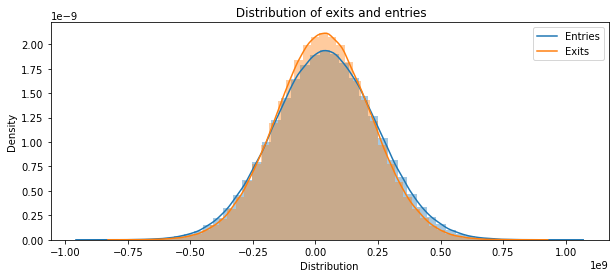

In [43]:
plt.figure(figsize=(10,4))

plt.title(" Distribution of exits and entries")

sns.distplot(norm_entries)
sns.distplot(norm_exits)
plt.xlabel("Distribution")
plt.legend(["Entries","Exits"]);

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'exits')

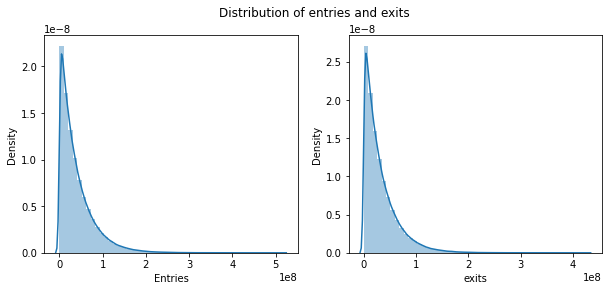

In [44]:
plt.figure(figsize=(10,4))
plt.suptitle("Distribution of entries and exits")
plt.subplot(1,2,1)
sns.distplot(exp_entries)
plt.xlabel("Entries")
plt.subplot(1,2,2)
sns.distplot(exp_exits)
plt.xlabel("exits")

#### The maximum ENTRIES and EXITS values would be at the last reading of the day. 
- Since rows are listed in descending order of time, we can grab the last reading of the day (located at the top of the group) using the `.first()` DataFrame method.

In [45]:
mta_daily= (mta
            
            
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME","DAY_NAME"],as_index=False)
                         ["ENTRIES","EXITS"].first())



<ipython-input-45-181a0ac7ddec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily= (mta


In [46]:
mta_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2018-06-30,Saturday,6675523,2262828
1,A002,R051,02-00-00,59 ST,2018-07-01,Sunday,6676241,2263043
2,A002,R051,02-00-00,59 ST,2018-07-02,Monday,6676762,2263176
3,A002,R051,02-00-00,59 ST,2018-07-03,Tuesday,6678118,2263609
4,A002,R051,02-00-00,59 ST,2018-07-04,Wednesday,6679449,2264049
5,A002,R051,02-00-00,59 ST,2018-07-05,Thursday,6680050,2264211
6,A002,R051,02-00-00,59 ST,2018-07-06,Friday,6681359,2264631
7,A002,R051,02-00-00,59 ST,2018-07-07,Saturday,6682646,2265021
8,A002,R051,02-00-00,59 ST,2018-07-08,Sunday,6683288,2265217
9,A002,R051,02-00-00,59 ST,2018-07-09,Monday,6683746,2265374


In [47]:
#mta_daily.sort_values(["ENTRIES","EXITS"],inplace=True , ascending=[False,False])

### To make Daily Entries and Exits

- We would to calculate daily entries,daily exits 

- To Know the number of new entries\exits gained each day.

In [48]:
mta_daily[["PREV_DATE","PREV_ENTRIES","PREV_EXITS"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME","ENTRIES","EXITS"]
                                                       .apply(lambda x: x.shift(1)))

<ipython-input-48-6187f70a8df7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily[["PREV_DATE","PREV_ENTRIES","PREV_EXITS"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME","ENTRIES","EXITS"]


In [49]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2018-06-30,Saturday,6675523,2262828,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,2018-07-01,Sunday,6676241,2263043,2018-06-30,6675523.0,2262828.0
2,A002,R051,02-00-00,59 ST,2018-07-02,Monday,6676762,2263176,2018-07-01,6676241.0,2263043.0
3,A002,R051,02-00-00,59 ST,2018-07-03,Tuesday,6678118,2263609,2018-07-02,6676762.0,2263176.0
4,A002,R051,02-00-00,59 ST,2018-07-04,Wednesday,6679449,2264049,2018-07-03,6678118.0,2263609.0


### Make sure to drop null value in first row

In [50]:
# Drop the row for the earliest date in the dataset
mta_daily.dropna(subset=["PREV_ENTRIES"],axis=0, inplace=True)

In [51]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,2018-07-01,Sunday,6676241,2263043,2018-06-30,6675523.0,2262828.0
2,A002,R051,02-00-00,59 ST,2018-07-02,Monday,6676762,2263176,2018-07-01,6676241.0,2263043.0
3,A002,R051,02-00-00,59 ST,2018-07-03,Tuesday,6678118,2263609,2018-07-02,6676762.0,2263176.0
4,A002,R051,02-00-00,59 ST,2018-07-04,Wednesday,6679449,2264049,2018-07-03,6678118.0,2263609.0
5,A002,R051,02-00-00,59 ST,2018-07-05,Thursday,6680050,2264211,2018-07-04,6679449.0,2264049.0


In [52]:
#mta_daily.sample(50)

In [53]:
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].head(3)

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1086,A002,R051,02-05-00,59 ST,2018-08-02 00:00:00,Thursday,1,0,2018-08-01 00:00:00,1564.0,0.0
2151,A006,R079,00-03-01,5 AV/59 ST,2018-08-09 02:00:00,Thursday,1097,119,2018-08-08 02:00:00,2997543.0,1595626.0
2347,A006,R079,00-03-02,5 AV/59 ST,2018-10-26 14:00:00,Friday,336,300,2018-10-25 02:00:00,15255717.0,15584253.0


In [54]:
(mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-05-00  59 ST                1
A006   R079  00-03-01  5 AV/59 ST           1
             00-03-02  5 AV/59 ST           1
A007   R079  01-06-00  5 AV/59 ST           1
A011   R080  01-00-00  57 ST-7 AV         118
                                         ... 
R646   R110  01-00-01  FLATBUSH AV-B.C    117
R730   R431  00-00-04  EASTCHSTER/DYRE    113
S101A  R070  01-03-03  ST. GEORGE           1
TRAM1  R468  00-00-00  RIT-MANHATTAN        1
             00-00-02  RIT-MANHATTAN        1
Length: 261, dtype: int64

In [55]:
(mta_daily[mta_daily["EXITS"] < mta_daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A006   R079  00-03-01  5 AV/59 ST           1
             00-03-02  5 AV/59 ST           1
A007   R079  01-06-00  5 AV/59 ST           1
A011   R080  01-00-00  57 ST-7 AV         118
             01-00-03  57 ST-7 AV         118
                                         ... 
R644   R135  01-06-00  NEWKIRK AV           1
R646   R110  01-00-01  FLATBUSH AV-B.C    118
S101A  R070  01-03-03  ST. GEORGE           1
TRAM1  R468  00-00-00  RIT-MANHATTAN        1
             00-00-02  RIT-MANHATTAN        1
Length: 272, dtype: int64

In [56]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1097 2997543.0
336 15255717.0
458806 3408576.0
62 1553987560.0
1135 1646680786.0
552547867 2106.0
1287 1813694.0
1525 15832652.0
19 3144648.0
3584236 16809292.0
458754 67109013.0
16824342 102385.0
419 3956142.0
1864238 67952524.0
881471 117756217.0
1048 2944268.0
4952 15071100.0
300 1071940.0
458752 150994944.0
459482 6300572.0
525054 3346426.0
13 2183820.0
1120 8203332.0
10 2477520.0
1114281 6549.0
1248 20220079.0
460550 119257511.0
1208002395 4781477.0
5599854 13155.0
135 5212062.0
3794854 812849.0
64 3794869.0
580 1149724.0
605 1684585.0
231 1122816.0
44508420 1493041962.0
0 5877814.0
458917 3119405.0
41 1579771.0
262371 1581423.0
85 1632278.0
8781866 4717295.0
119 7014214.0
685 1512945.0
4686 9652856.0
0 50331648.0
74 871938592.0
124 4648534.0
579 1511819.0
141 1064290.0
1073104 527.0
1301 1073104.0
1078106 1488.0
2031 1078106.0
1081476 2031.0
3289 1083416.0
1087597 3289.0
4383 1090904.0
1099462 4796.0
5577 1099462.0
1106646 5952.0
6364 1107838.0
1112083 6364.0
7082 1112083.0
11314

In [57]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_EXITS"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

119 1595626.0
300 15584253.0
35 6968742.0
46 2050278344.0
308 1057706375.0
1897275638 251.0
9 4900489.0
621 7629052.0
5 1827831.0
2528973 16996250.0
0 16777216.0
527 3271172.0
4724159 16808096.0
1944096 119318.0
4370 13089296.0
2 16777350.0
240 2437213.0
413 4978599.0
35 16461732.0
126 1796423.0
1164 43143547.0
1761653653 6905908.0
9797248 38508.0
2 1800658.0
139 1917437.0
858 1696629.0
24003263 1845582854.0
0 2460573.0
263 2638246.0
69 1145719.0
457 11037456.0
294 1150750.0
1099 7833113.0
475 1421348.0
2620 7502800.0
1 16778559.0
34 2029893878.0
178 5491771.0
1012625 5369.0
5502 1012625.0
1034141 6832.0
1 1291212.0
349 1281225.0
0 1068541.0
0 1087517.0
861 1475462.0
539 1665411.0
3100 1138683.0
173 34068593.0
314 2397667.0
2 33554571.0
1155581858 2082654.0
331 9621891.0
35 7581559.0
205 3403754.0
393449 4357750.0
1283 15083915.0
205 1830433.0
309 1708609.0
65 1486976.0
658 1295326.0
1160 3822880.0
360 1778990.0
23462382 271423.0
989 3119691.0
453044534 1775703.0
520150244 2070225.0
40

In [58]:
mta_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550294 entries, 1 to 555155
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   C/A            550294 non-null  object        
 1   UNIT           550294 non-null  object        
 2   SCP            550294 non-null  object        
 3   STATION        550294 non-null  object        
 4   DATE_TIME      550294 non-null  datetime64[ns]
 5   DAY_NAME       550294 non-null  object        
 6   ENTRIES        550294 non-null  int64         
 7   EXITS          550294 non-null  int64         
 8   PREV_DATE      550294 non-null  datetime64[ns]
 9   PREV_ENTRIES   550294 non-null  float64       
 10  PREV_EXITS     550294 non-null  float64       
 11  DAILY_ENTRIES  550294 non-null  float64       
 12  DAILY_EXITS    550294 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 58.8+ MB


In [59]:
mta_daily.head(3)

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2018-07-01,Sunday,6676241,2263043,2018-06-30,6675523.0,2262828.0,718.0,215.0
2,A002,R051,02-00-00,59 ST,2018-07-02,Monday,6676762,2263176,2018-07-01,6676241.0,2263043.0,521.0,133.0
3,A002,R051,02-00-00,59 ST,2018-07-03,Tuesday,6678118,2263609,2018-07-02,6676762.0,2263176.0,1356.0,433.0


In [60]:
mta_daily.isnull().sum()

C/A              0
UNIT             0
SCP              0
STATION          0
DATE_TIME        0
DAY_NAME         0
ENTRIES          0
EXITS            0
PREV_DATE        0
PREV_ENTRIES     0
PREV_EXITS       0
DAILY_ENTRIES    0
DAILY_EXITS      0
dtype: int64

In [61]:
#We want to groupby interval time (each 8 hours) to identify the shift work.
s=(mta_daily.groupby(pd.Grouper(key="DATE_TIME", freq="8H"))
                                                .apply(lambda x: x.groupby(['STATION','C/A',"DAY_NAME"]).sum())
                           )
s=s.reset_index()
s.head(10)

,DATE_TIME,STATION,C/A,DAY_NAME,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
0,2018-07-01,1 AV,H007,Sunday,451380726,441531543,4.513722e+08,4.415243e+08,8477.0,7258.0
1,2018-07-01,1 AV,H008,Sunday,2586594722,1184421352,2.586586e+09,1.184410e+09,8315.0,11338.0
2,2018-07-01,103 ST,N037,Sunday,28540232,24821125,2.853674e+07,2.482042e+07,3494.0,707.0
3,2018-07-01,103 ST,R170,Sunday,60557316,32841615,6.054901e+07,3.283771e+07,8309.0,3903.0
4,2018-07-01,103 ST,R252,Sunday,63450603,541370478,6.344377e+07,5.413636e+08,6836.0,6867.0
5,2018-07-01,103 ST-CORONA,R529,Sunday,65765756,67622220,6.575158e+07,6.761139e+07,14171.0,10829.0
6,2018-07-01,104 ST,J034,Sunday,3157531208,2539165068,3.157531e+09,2.539165e+09,28.0,74.0
7,2018-07-01,104 ST,N137,Sunday,1684829291,979571366,1.684829e+09,9.795710e+08,968.0,374.0
8,2018-07-01,110 ST,R253,Sunday,14625106,26776146,1.462295e+07,2.677174e+07,2154.0,4409.0
9,2018-07-01,110 ST,R254,Sunday,20265848,6867045,2.026121e+07,6.864922e+06,4638.0,2123.0


In [62]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2018-07-01,Sunday,6676241,2263043,2018-06-30,6675523.0,2262828.0,718.0,215.0
2,A002,R051,02-00-00,59 ST,2018-07-02,Monday,6676762,2263176,2018-07-01,6676241.0,2263043.0,521.0,133.0
3,A002,R051,02-00-00,59 ST,2018-07-03,Tuesday,6678118,2263609,2018-07-02,6676762.0,2263176.0,1356.0,433.0
4,A002,R051,02-00-00,59 ST,2018-07-04,Wednesday,6679449,2264049,2018-07-03,6678118.0,2263609.0,1331.0,440.0
5,A002,R051,02-00-00,59 ST,2018-07-05,Thursday,6680050,2264211,2018-07-04,6679449.0,2264049.0,601.0,162.0


In [63]:
#For each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile 
turnstile_daily = s.groupby(["STATION","C/A","DATE_TIME","DAY_NAME"])["DAILY_EXITS","DAILY_ENTRIES"].sum().reset_index()
                    
turnstile_daily


<ipython-input-63-47c075b0ca5b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstile_daily = s.groupby(["STATION","C/A","DATE_TIME","DAY_NAME"])["DAILY_EXITS","DAILY_ENTRIES"].sum().reset_index()


,STATION,C/A,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES
0,1 AV,H007,2018-07-01,Sunday,7258.0,8477.0
1,1 AV,H007,2018-07-02,Monday,5296.0,6207.0
2,1 AV,H007,2018-07-03,Tuesday,6809.0,10816.0
3,1 AV,H007,2018-07-04,Wednesday,7371.0,11409.0
4,1 AV,H007,2018-07-05,Thursday,7683.0,7402.0
...,...,...,...,...,...,...
85650,ZEREGA AV,R419,2018-10-22,Monday,1099.0,976.0
85651,ZEREGA AV,R419,2018-10-23,Tuesday,2610.0,2741.0
85652,ZEREGA AV,R419,2018-10-24,Wednesday,2698.0,2871.0
85653,ZEREGA AV,R419,2018-10-25,Thursday,2789.0,2986.0


In [64]:
# To find the max daily exits for top 10 stations
station_dailyExits_max = turnstile_daily.groupby(["STATION"])["DAILY_EXITS"].sum().reset_index()
station_dailyExits_max=station_dailyExits_max.sort_values(by="DAILY_EXITS", ascending=False).head(10)#iloc[1:10] 
station_dailyExits_max


,STATION,DAILY_EXITS
258,JOURNAL SQUARE,21061268.0
61,34 ST-PENN STA,15087326.0
233,GRD CNTRL-42 ST,14700056.0
59,34 ST-HERALD SQ,11204443.0
315,PATH NEW WTC,11100078.0
353,TIMES SQ-42 ST,10042142.0
14,14 ST-UNION SQ,9222479.0
226,FULTON ST,8471531.0
68,42 ST-PORT AUTH,7990660.0
46,23 ST,7450421.0


In [65]:
# To find the max daily entries for top 10 stations
station_dailyEntries_max = turnstile_daily.groupby(["STATION"])["DAILY_ENTRIES"].sum().reset_index()
station_dailyEntries_max =station_dailyEntries_max.sort_values(by="DAILY_ENTRIES", ascending=False).head(10)#iloc[:9] 
station_dailyEntries_max 

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,16785300.0
233,GRD CNTRL-42 ST,15984962.0
59,34 ST-HERALD SQ,12767193.0
315,PATH NEW WTC,11667354.0
14,14 ST-UNION SQ,11244340.0
353,TIMES SQ-42 ST,10829023.0
226,FULTON ST,10756275.0
68,42 ST-PORT AUTH,10715563.0
46,23 ST,10564920.0
173,CANAL ST,8018383.0


## Plots

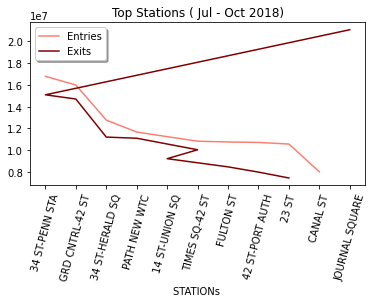

In [66]:


fig=plt.figure(figsize=(6, 3))


plt.plot(station_dailyEntries_max.STATION,station_dailyEntries_max.DAILY_ENTRIES, color='salmon')
plt.plot(station_dailyExits_max.STATION,station_dailyExits_max.DAILY_EXITS, color='maroon')
plt.title('Top Stations ( Jul - Oct 2018)')
plt.xlabel('STATIONs ')
#plt.ylabel('DAILY ENTRIES')
plt.xticks(rotation=75)
plt.legend(['Entries','Exits'],shadow = True, loc = 0);
plt.savefig('entries_exits.png',dpi=300, bbox_inches='tight')


### Add column  that count daily traffic

In [67]:
#add new column named "BUSY" which is (entries+exits) daily 

turnstile_daily['BUSY'] = turnstile_daily['DAILY_ENTRIES'].values + turnstile_daily['DAILY_EXITS'].values


In [68]:
turnstile_daily.head()

,STATION,C/A,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES,BUSY
0,1 AV,H007,2018-07-01,Sunday,7258.0,8477.0,15735.0
1,1 AV,H007,2018-07-02,Monday,5296.0,6207.0,11503.0
2,1 AV,H007,2018-07-03,Tuesday,6809.0,10816.0,17625.0
3,1 AV,H007,2018-07-04,Wednesday,7371.0,11409.0,18780.0
4,1 AV,H007,2018-07-05,Thursday,7683.0,7402.0,15085.0


In [69]:
turnstile_daily.head()

,STATION,C/A,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES,BUSY
0,1 AV,H007,2018-07-01,Sunday,7258.0,8477.0,15735.0
1,1 AV,H007,2018-07-02,Monday,5296.0,6207.0,11503.0
2,1 AV,H007,2018-07-03,Tuesday,6809.0,10816.0,17625.0
3,1 AV,H007,2018-07-04,Wednesday,7371.0,11409.0,18780.0
4,1 AV,H007,2018-07-05,Thursday,7683.0,7402.0,15085.0


### Find top 10 busiest stations

In [70]:
top_10_busy=turnstile_daily.groupby(['STATION','C/A','DAY_NAME']).agg({'BUSY': sum}).sort_values(by = 'BUSY', ascending = False).reset_index()


top_10_busy

,STATION,C/A,DAY_NAME,BUSY
0,JOURNAL SQUARE,PTH03,Thursday,6001195.0
1,PATH NEW WTC,PTH22,Wednesday,5329785.0
2,JOURNAL SQUARE,PTH03,Tuesday,5182968.0
3,JOURNAL SQUARE,PTH03,Wednesday,4917942.0
4,PATH NEW WTC,PTH22,Tuesday,4029120.0
...,...,...,...,...
5236,28 ST,R230,Sunday,0.0
5237,BROAD ST,A085,Sunday,0.0
5238,BROAD ST,A085,Saturday,0.0
5239,BROAD ST,A085,Monday,0.0


### To find the top 10 traffic stations we'll ignoring the control units of each station.
- This project takes the top 10 stations with C/A , then we group by station only to avoid the duplicate station

In [71]:
top_busy=top_10_busy.groupby(['STATION']).agg({'BUSY': sum}).sort_values(by = 'BUSY', ascending = False).reset_index().head(10)
top_busy

,STATION,BUSY
0,34 ST-PENN STA,31872626.0
1,GRD CNTRL-42 ST,30685018.0
2,JOURNAL SQUARE,25786908.0
3,34 ST-HERALD SQ,23971636.0
4,PATH NEW WTC,22767432.0
5,TIMES SQ-42 ST,20871165.0
6,14 ST-UNION SQ,20466819.0
7,FULTON ST,19227806.0
8,42 ST-PORT AUTH,18706223.0
9,23 ST,18015341.0


### Filtering the data set to focus on top 10 stations

- Creat list contains of top 10 stations 

In [72]:

top=['34 ST-PENN STA','GRD CNTRL-42 ST' ,'JOURNAL SQUARE','34 ST-HERALD SQ','PATH NEW WTC','TIMES SQ-42 ST',"14 ST-UNION SQ",
    'FULTON ST','42 ST-PORT AUTH','23 ST']
    

In [73]:
#top_stations=mta_daily[mta_daily.STATION.isin(top_stations_list)]
#top_stations
top_stations=turnstile_daily[turnstile_daily.STATION.isin(top)]
top_stations

,STATION,C/A,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES,BUSY
5043,14 ST-UNION SQ,A033,2018-07-01,Sunday,13213.0,11806.0,25019.0
5044,14 ST-UNION SQ,A033,2018-07-02,Monday,9165.0,8898.0,18063.0
5045,14 ST-UNION SQ,A033,2018-07-03,Tuesday,19327.0,20962.0,40289.0
5046,14 ST-UNION SQ,A033,2018-07-04,Wednesday,19732.0,21467.0,41199.0
5047,14 ST-UNION SQ,A033,2018-07-05,Thursday,8427.0,7816.0,16243.0
...,...,...,...,...,...,...,...
80652,TIMES SQ-42 ST,R151,2018-10-22,Monday,18407.0,18430.0,36837.0
80653,TIMES SQ-42 ST,R151,2018-10-23,Tuesday,21321.0,22943.0,44264.0
80654,TIMES SQ-42 ST,R151,2018-10-24,Wednesday,23373.0,25744.0,49117.0
80655,TIMES SQ-42 ST,R151,2018-10-25,Thursday,23473.0,27056.0,50529.0


In [74]:
station__top_entries =top_stations.groupby(["STATION"])["DAILY_ENTRIES"].sum().reset_index()
station__top_entries =station__top_entries.sort_values(by="DAILY_ENTRIES", ascending=False) #iloc[:9] 
station__top_entries

,STATION,DAILY_ENTRIES
3,34 ST-PENN STA,16785300.0
6,GRD CNTRL-42 ST,15984962.0
2,34 ST-HERALD SQ,12767193.0
8,PATH NEW WTC,11667354.0
0,14 ST-UNION SQ,11244340.0
9,TIMES SQ-42 ST,10829023.0
5,FULTON ST,10756275.0
4,42 ST-PORT AUTH,10715563.0
1,23 ST,10564920.0
7,JOURNAL SQUARE,4725640.0


In [75]:
station__top_exits=top_stations.groupby(["STATION"])["DAILY_EXITS"].sum().reset_index()
station__top_exits =station__top_exits.sort_values(by="DAILY_EXITS", ascending=False).head(11) #iloc[:9] 
station__top_exits

,STATION,DAILY_EXITS
7,JOURNAL SQUARE,21061268.0
3,34 ST-PENN STA,15087326.0
6,GRD CNTRL-42 ST,14700056.0
2,34 ST-HERALD SQ,11204443.0
8,PATH NEW WTC,11100078.0
9,TIMES SQ-42 ST,10042142.0
0,14 ST-UNION SQ,9222479.0
5,FULTON ST,8471531.0
4,42 ST-PORT AUTH,7990660.0
1,23 ST,7450421.0


In [76]:
station__top_busy=top_stations.groupby(["STATION"])["BUSY"].sum().reset_index()
station__top_busy =station__top_busy.sort_values(by="BUSY", ascending=False).head(11) #iloc[:9] 
station__top_busy

,STATION,BUSY
3,34 ST-PENN STA,31872626.0
6,GRD CNTRL-42 ST,30685018.0
7,JOURNAL SQUARE,25786908.0
2,34 ST-HERALD SQ,23971636.0
8,PATH NEW WTC,22767432.0
9,TIMES SQ-42 ST,20871165.0
0,14 ST-UNION SQ,20466819.0
5,FULTON ST,19227806.0
4,42 ST-PORT AUTH,18706223.0
1,23 ST,18015341.0


## Merging table to identify the daily entries , daily exits and daily busy for each top station

In [77]:
merge_table = pd.merge(station__top_exits, station__top_entries)

merge_table=pd.merge(merge_table,station__top_busy).sort_values(by="BUSY" , ascending=False)
merge_table

,STATION,DAILY_EXITS,DAILY_ENTRIES,BUSY
1,34 ST-PENN STA,15087326.0,16785300.0,31872626.0
2,GRD CNTRL-42 ST,14700056.0,15984962.0,30685018.0
0,JOURNAL SQUARE,21061268.0,4725640.0,25786908.0
3,34 ST-HERALD SQ,11204443.0,12767193.0,23971636.0
4,PATH NEW WTC,11100078.0,11667354.0,22767432.0
5,TIMES SQ-42 ST,10042142.0,10829023.0,20871165.0
6,14 ST-UNION SQ,9222479.0,11244340.0,20466819.0
7,FULTON ST,8471531.0,10756275.0,19227806.0
8,42 ST-PORT AUTH,7990660.0,10715563.0,18706223.0
9,23 ST,7450421.0,10564920.0,18015341.0


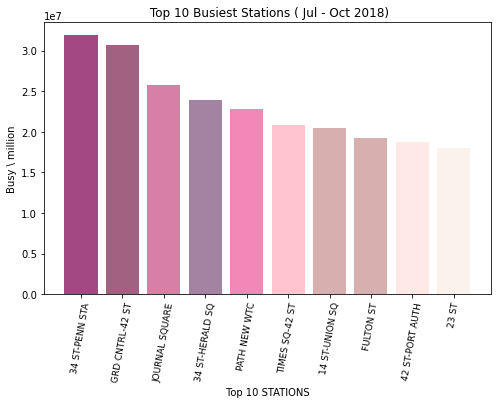

In [78]:
fig=plt.figure(figsize=(8, 5))

opacity=0.8
plt.bar( merge_table["STATION"],top_busy.BUSY,alpha=opacity,color=['#8B1C62','#8B3A62','#CD6090','#8B668B', '#EE6AA7','#FFB6C1', '#CD9B9B','#CD9B9B','#FFE4E1','#FAF0E6','#FFDAB9'])

plt.title(' Top 10 Busiest Stations ( Jul - Oct 2018)',fontsize=12)
plt.xlabel(' Top 10 STATIONS ',fontsize=10)
plt.ylabel('Busy \ million',fontsize=10)
plt.xticks(rotation=80,fontsize=9)
plt.yticks(fontsize=10)
plt.savefig('TOP10BUSYY.png',dpi=200, bbox_inches='tight')

### To explore the numbers of the daily entries and exits and traffic visually

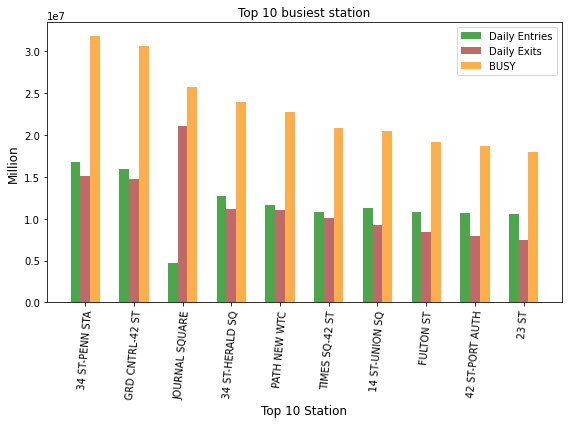

In [79]:

index = np.arange(10)
bar_width = 0.20
opacity = 0.7
plt.figure(figsize=(8,6))
rects1 = plt.bar(index, merge_table.DAILY_ENTRIES, bar_width,
alpha=opacity,
color='g',
label='Daily Entries')

rects2 = plt.bar(index + bar_width, merge_table.DAILY_EXITS, bar_width,
alpha=opacity,
color='brown',
label='Daily Exits')

rects3 = plt.bar(index + 2*bar_width, merge_table.BUSY, bar_width,
alpha=opacity,
color='#FF8C00',
label='BUSY')

plt.xlabel('Top 10 Station',fontsize=12)
plt.ylabel('Million',fontsize=12)
plt.title('Top 10 busiest station',fontsize=12)
plt.xticks(index + bar_width, ('34 ST-PENN STA','GRD CNTRL-42 ST' ,'JOURNAL SQUARE','34 ST-HERALD SQ','PATH NEW WTC','TIMES SQ-42 ST',"14 ST-UNION SQ",
    'FULTON ST','42 ST-PORT AUTH','23 ST') , rotation=85,fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

plt.tight_layout()

plt.savefig('Entries_exits_busy.png',dpi=200, bbox_inches='tight');

### The same as above but here using heatmap plot

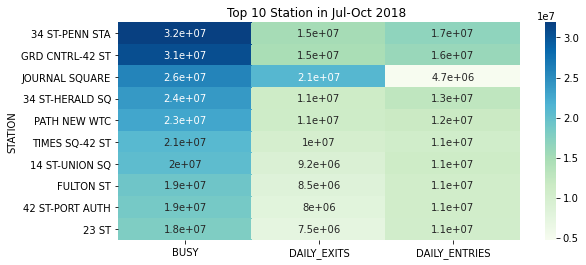

In [102]:
av=merge_table.groupby(['STATION'])[["DAILY_ENTRIES","DAILY_EXITS","BUSY"]].agg({'BUSY': 'mean',"DAILY_EXITS": 'mean',"DAILY_ENTRIES":'mean' }).sort_values(by = 'BUSY', ascending = False).head(10)

plt.figure(figsize=(9,4))
plt.title("Top 10 Station in Jul-Oct 2018 ")
plt.xlabel("")
avrg = av.groupby(by = ['STATION']).mean()
avrg
sns.heatmap(av,cmap='GnBu',annot=True);
plt.savefig('heatmap_entries_exits.png',dpi=200, bbox_inches='tight')

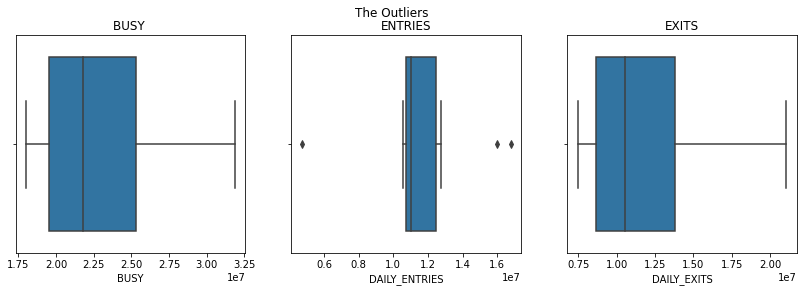

In [103]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.suptitle("The Outliers ")

sns.boxplot(data=turnstile_daily ,x=merge_table["BUSY"])
plt.title("BUSY ")
plt.subplot(1,3,2)
sns.boxplot(data=top_stations,x=merge_table['DAILY_ENTRIES'])
plt.title("ENTRIES")

plt.subplot(1,3,3)
sns.boxplot(data=top_stations,x=merge_table['DAILY_EXITS'])
plt.title("EXITS")

plt.savefig('boxplot.png',dpi=300, bbox_inches='tight')

In [82]:
mta_stationPnn = mta_daily[mta_daily['STATION'] == '34 ST-PENN STA']
mta_stationPnn

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
141383,N067,R012,00-00-00,34 ST-PENN STA,2018-07-01 00:00:00,Sunday,2050322,2107229,2018-06-30 00:00:00,2049899.0,2106471.0,423.0,758.0
141384,N067,R012,00-00-00,34 ST-PENN STA,2018-07-02 00:00:00,Monday,2050714,2107802,2018-07-01 00:00:00,2050322.0,2107229.0,392.0,573.0
141385,N067,R012,00-00-00,34 ST-PENN STA,2018-07-03 00:00:00,Tuesday,2051526,2109528,2018-07-02 00:00:00,2050714.0,2107802.0,812.0,1726.0
141386,N067,R012,00-00-00,34 ST-PENN STA,2018-07-04 00:00:00,Wednesday,2052319,2111194,2018-07-03 00:00:00,2051526.0,2109528.0,793.0,1666.0
141387,N067,R012,00-00-00,34 ST-PENN STA,2018-07-05 00:00:00,Thursday,2052512,2111545,2018-07-04 00:00:00,2052319.0,2111194.0,193.0,351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370526,R142,R293,01-06-01,34 ST-PENN STA,2018-10-22 02:00:00,Monday,67740486,18074996,2018-10-21 02:00:00,67739984.0,18073735.0,502.0,1261.0
370527,R142,R293,01-06-01,34 ST-PENN STA,2018-10-23 02:00:00,Tuesday,67741230,18076643,2018-10-22 02:00:00,67740486.0,18074996.0,744.0,1647.0
370528,R142,R293,01-06-01,34 ST-PENN STA,2018-10-24 02:00:00,Wednesday,67741976,18078316,2018-10-23 02:00:00,67741230.0,18076643.0,746.0,1673.0
370529,R142,R293,01-06-01,34 ST-PENN STA,2018-10-25 02:00:00,Thursday,67742776,18079828,2018-10-24 02:00:00,67741976.0,18078316.0,800.0,1512.0


In [83]:
mta_station_JO = turnstile_daily[turnstile_daily['STATION'] == 'JOURNAL SQUARE']
mta_station_JO.max()

STATION               JOURNAL SQUARE
C/A                            PTH03
DATE_TIME        2018-10-26 00:00:00
DAY_NAME                   Wednesday
DAILY_EXITS                1126418.0
DAILY_ENTRIES               787372.0
BUSY                       1733417.0
dtype: object

## Find the max day of each station

In [84]:
max_day=top_stations.groupby(['STATION','DATE_TIME','DAY_NAME']).agg({'BUSY':'max'}).sort_values(by='BUSY', ascending=False).reset_index()
max_day


,STATION,DATE_TIME,DAY_NAME,BUSY
0,JOURNAL SQUARE,2018-10-25 00:00:00,Thursday,1733417.0
1,PATH NEW WTC,2018-10-24 00:00:00,Wednesday,1424329.0
2,PATH NEW WTC,2018-08-22 00:00:00,Wednesday,1420848.0
3,PATH NEW WTC,2018-08-07 00:00:00,Tuesday,1266144.0
4,FULTON ST,2018-08-09 00:00:00,Thursday,1169170.0
...,...,...,...,...
1226,34 ST-PENN STA,2018-08-30 16:00:00,Thursday,6.0
1227,23 ST,2018-09-04 16:00:00,Tuesday,5.0
1228,23 ST,2018-07-19 16:00:00,Thursday,2.0
1229,42 ST-PORT AUTH,2018-10-20 08:00:00,Saturday,2.0


In [85]:
ff=max_day.groupby(['DAY_NAME','STATION']).agg({'BUSY':'max'}).sort_values(by='BUSY', ascending=False)
ff.head(60)

BUSY
DAY_NAME  STATION                   
Thursday  JOURNAL SQUARE   1733417.0
Wednesday PATH NEW WTC     1424329.0
Tuesday   PATH NEW WTC     1266144.0
Thursday  FULTON ST        1169170.0
Wednesday JOURNAL SQUARE   1058958.0
Friday    PATH NEW WTC     1052939.0
          JOURNAL SQUARE   1014185.0
Tuesday   JOURNAL SQUARE   1002762.0
Saturday  JOURNAL SQUARE   1001449.0
Sunday    JOURNAL SQUARE    998542.0
Wednesday GRD CNTRL-42 ST   974549.0
Monday    JOURNAL SQUARE    958199.0
Thursday  PATH NEW WTC      882476.0
Tuesday   GRD CNTRL-42 ST   791642.0
Sunday    PATH NEW WTC      763709.0
Monday    PATH NEW WTC      740994.0
Friday    14 ST-UNION SQ    716637.0
Thursday  34 ST-PENN STA    662982.0
Saturday  PATH NEW WTC      633409.0
Thursday  GRD CNTRL-42 ST   556514.0
Sunday    34 ST-HERALD SQ   167241.0
Friday    GRD CNTRL-42 ST   115294.0
Saturday  GRD CNTRL-42 ST   111502.0
          34 ST-PENN STA    101139.0
Friday    34 ST-PENN STA     91295.0
Wednesday 34 ST-PENN STA     88631.0
Tuesday   34 ST-PENN STA     80678.0
Saturday  42 ST-PORT AUTH    78576.0
          34 ST-HERALD SQ    71813.0
Wednesday 42 ST-PORT AUTH    71640.0
Sunday    GRD CNTRL-42 ST    68163.0
Friday    34 ST-HERALD SQ    68154.0
          42 ST-PORT AUTH    68093.0
Thursday  42 ST-PORT AUTH    67674.0
          34 ST-HERALD SQ    67421.0
Wednesday 34 ST-HERALD SQ    66374.0
Saturday  14 ST-UNION SQ     65054.0
Tuesday   42 ST-PORT AUTH    64785.0
Sunday    34 ST-PENN STA     64346.0
Thursday  14 ST-UNION SQ     63899.0
Tuesday   34 ST-HERALD SQ    63191.0
Monday    42 ST-PORT AUTH    62648.0
Wednesday 14 ST-UNION SQ     60929.0
Monday    GRD CNTRL-42 ST    58304.0
Tuesday   14 ST-UNION SQ     57586.0
Saturday  TIMES SQ-42 ST     55578.0
Sunday    TIMES SQ-42 ST     54144.0
Thursday  TIMES SQ-42 ST     52331.0
Friday    TIMES SQ-42 ST     51831.0
Wednesday 23 ST              51045.0
          TIMES SQ-42 ST     50762.0
Sunday    14 ST-UNION SQ     49050.0
Saturday  FULTON ST          48110.0
Monday    34 ST-HERALD SQ    46630.0
Tuesday   TIMES SQ-42 ST     45734.0
Monday    TIMES SQ-42 ST     44416.0
          34 ST-PENN STA     43330.0
Wednesday FULTON ST          41137.0
Friday    FULTON ST          39950.0
Sunday    42 ST-PORT AUTH    39316.0

In [86]:
mask1=(max_day[(max_day['STATION']=='JOURNAL SQUARE')]);

mask1.head()


,STATION,DATE_TIME,DAY_NAME,BUSY
0,JOURNAL SQUARE,2018-10-25,Thursday,1733417.0
5,JOURNAL SQUARE,2018-09-19,Wednesday,1058958.0
7,JOURNAL SQUARE,2018-09-13,Thursday,1047727.0
8,JOURNAL SQUARE,2018-09-06,Thursday,1027939.0
9,JOURNAL SQUARE,2018-09-05,Wednesday,1026485.0


### Weekdays at Top 3 stations

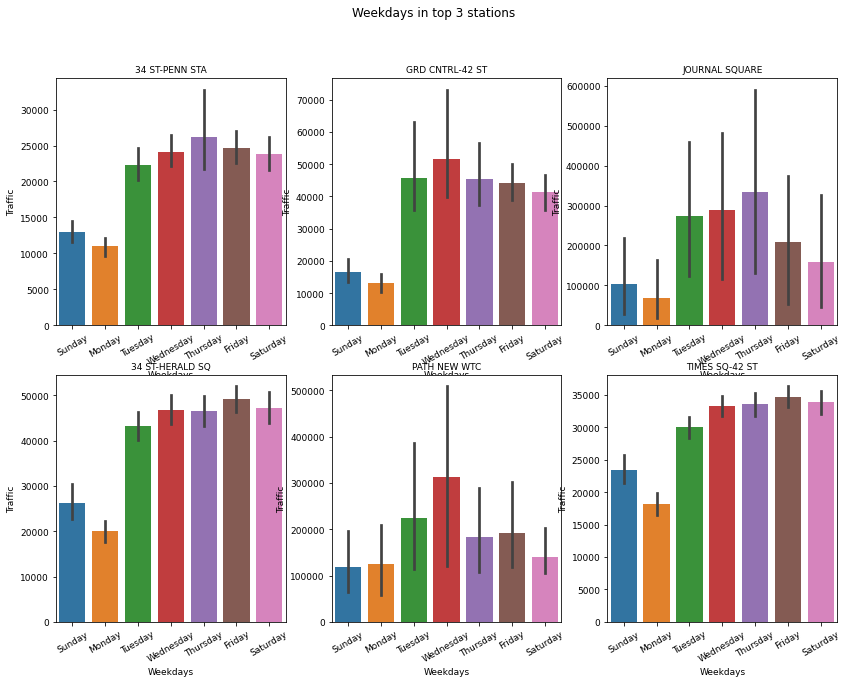

In [87]:
mask1=(turnstile_daily[(turnstile_daily['STATION']=='JOURNAL SQUARE')]);
mask2=(turnstile_daily[(turnstile_daily['STATION']=='34 ST-PENN STA')]);
mask3=(turnstile_daily[(turnstile_daily['STATION']=='GRD CNTRL-42 ST')]);
mask4=(turnstile_daily[(turnstile_daily['STATION']=='34 ST-HERALD SQ')]);
mask6=(turnstile_daily[(turnstile_daily['STATION']=='TIMES SQ-42 ST')]);
mask5=(turnstile_daily[(turnstile_daily['STATION']=='PATH NEW WTC')]);


plt.figure(figsize=(14,10))

plt.suptitle('Weekdays in top 3 stations')



plt.subplot(2,3,1)
sns.barplot(x ='DAY_NAME',y='BUSY',data=mask2).set_title('34 ST-PENN STA',fontsize=9)
plt.xlabel("Weekdays",fontsize=9)
plt.ylabel("Traffic",fontsize=9)
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9);
#plt.savefig('st.png',dpi=300, bbox_inches='tight')

plt.subplot(2,3,2)
sns.barplot(x ='DAY_NAME',y='BUSY',data=mask3).set_title('GRD CNTRL-42 ST',fontsize=9)
plt.xlabel("Weekdays",fontsize=9)
plt.ylabel("Traffic",fontsize=9)
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9);

plt.subplot(2,3,3)
sns.barplot(x ='DAY_NAME',y='BUSY',data=mask1).set_title('JOURNAL SQUARE',fontsize=9)
plt.xlabel("Weekdays",fontsize=9)
plt.ylabel("Traffic",fontsize=9)
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9);
plt.savefig('top_days.png',dpi=300, bbox_inches='tight')

plt.subplot(2,3,4)
sns.barplot(x ='DAY_NAME',y='BUSY',data=mask4).set_title('34 ST-HERALD SQ',fontsize=9)
plt.xlabel("Weekdays",fontsize=9)
plt.ylabel("Traffic",fontsize=9)
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9);
plt.savefig('top_days.png',dpi=300, bbox_inches='tight')


plt.subplot(2,3,5)
sns.barplot(x ='DAY_NAME',y='BUSY',data=mask5).set_title('PATH NEW WTC',fontsize=9)
plt.xlabel("Weekdays",fontsize=9)
plt.ylabel("Traffic",fontsize=9)
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9);
plt.savefig('top_days.png',dpi=300, bbox_inches='tight')

plt.subplot(2,3,6)
sns.barplot(x ='DAY_NAME',y='BUSY',data=mask6).set_title('TIMES SQ-42 ST',fontsize=9)
plt.xlabel("Weekdays",fontsize=9)
plt.ylabel("Traffic",fontsize=9)
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9);
plt.savefig('top_days.png',dpi=300, bbox_inches='tight')




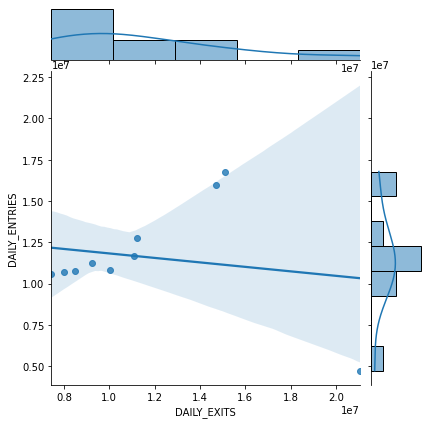

In [100]:

sns.jointplot(y="DAILY_ENTRIES", x="DAILY_EXITS", kind="reg", data=av);
plt.savefig('joint_ent_ext.png',dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

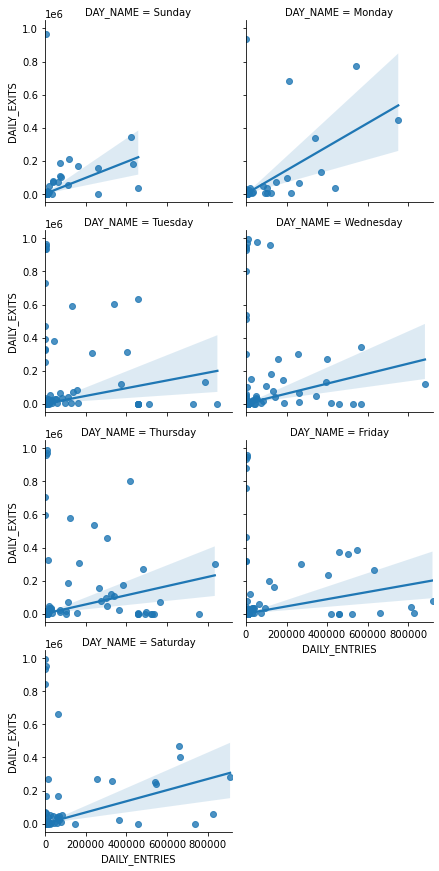

In [106]:
plt.suptitle("The regression between Daily Exits and Entries in each day")

sns.lmplot(x="DAILY_ENTRIES", y="DAILY_EXITS", col="DAY_NAME", data=mta_daily,
           col_wrap=2, height=3);

plt.savefig('lmplot.png',dpi=300, bbox_inches='tight')

In [91]:
print("Maximum Time: ")
print(mta_daily["DATE_TIME"].max())
print()
print("Minimum Time: ")
print(mta_daily["DATE_TIME"].min())

Maximum Time: 
2018-10-26 17:00:00

Minimum Time: 
2018-07-01 00:00:00


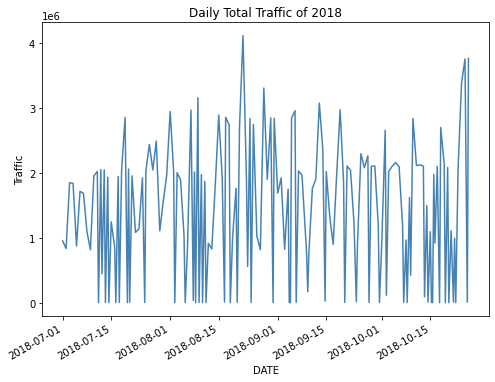

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure(figsize=(8,6))
top_stations = top_stations[['DATE_TIME', "BUSY"]].groupby(['DATE_TIME']).sum().reset_index()

top_stations.set_index('DATE_TIME')['BUSY'].plot(color = 'steelblue',title='Daily Total Traffic of 2018' )
plt.xlabel("DATE")
plt.ylabel("Traffic")
plt.show();
plt.savefig('total_traffic.png',dpi=300, bbox_inches='tight')
